The beigning of part 2 is exactly the same as in part 1. The data is loaded in and split into arrays

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv('D3.csv')
numRows = len(csv)
print(numRows)
csv.head(numRows)

X1 = csv.values[:,0]
X2 = csv.values[:,1]
X3 = csv.values[:,2]
Y = csv.values[:,3]
numTraining = len(Y)
print('There are ', numTraining, ' training examples.')

#Printing the first 5 records of each matrix
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('Y = ', Y[: 5])

99
There are  99  training examples.
X1 =  [0.04040404 0.08080808 0.12121212 0.16161616 0.2020202 ]
X2 =  [0.13494949 0.82989899 1.52484848 2.21979798 2.91474747]
X3 =  [0.88848485 1.3369697  1.78545455 2.23393939 2.68242424]
Y =  [2.6796499  2.96848981 3.25406475 3.53637472 3.81541972]


Because this time we want to use all 3 independent variables in the same algorithm instead they are placed into one extra wide matrix. The matrix has the format where each column is filled with the respective data. Column 1 is filled with 1s.

[X0, X1, X2, X3]

In [2]:
X_0 = np.ones((numTraining, 1))
X1_1 = X1.reshape(numTraining, 1)
X2_1 = X2.reshape(numTraining, 1)
X3_1 = X3.reshape(numTraining, 1)

X = np.hstack((X_0, X1_1, X2_1, X3_1))
X[:5]

array([[1.        , 0.04040404, 0.13494949, 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545455],
       [1.        , 0.16161616, 2.21979798, 2.23393939],
       [1.        , 0.2020202 , 2.91474747, 2.68242424]])

When there are 3 independent variables we will need a respective number of theta values. In this case 4 (theta0, theta1, theta2, theta3). These values are initialized as zeros below.

In [3]:
theta = np.zeros(4)
theta[:5]

array([0., 0., 0., 0.])

Because we are already using dot products to calculate the cost and gradients the code will not change to exand the number of variables. It is required that the theta and X matrices are the same width. The code for compute_costs and gradients has been borrowed from Part 1 of his Homework.

In [4]:
def compute_cost(XVals, YVals, theta):
    predictions = XVals.dot(theta) #Makes a prediction using the given values of they using 
                                   #the following equation: prediction = theta0 + theta1*X
    errors = np.subtract(predictions, YVals) #calculates the error from the prediction to the actual Y value
    sqrErrors = np.square(errors) #squaring the errors to make finding the minimum easier
    J = 1/(2*numTraining) * np.sum(sqrErrors)
    
    return J

In [5]:
def gradient_descent(XVals, YVals, theta, alpha, iterations):
    cost_history = np.zeros(iterations) #stores the calculated cost for each iteration of the algorithm
    for i in range(iterations):
        predictions = XVals.dot(theta) #tests the current theta value with each independent variable value
        errors = np.subtract(predictions, YVals)
        sum_delta = (alpha/numTraining) * XVals.transpose().dot(errors);
        theta = theta - sum_delta; #updating the value of theta based on the new data
        cost_history[i] = compute_cost(XVals, YVals, theta) #logging the cost to the cost history log
        
        
    return theta, cost_history  

The cost using the default value of zero for theta is calculated below

In [6]:
cost = compute_cost(X, Y, theta)
print('The initial cost using 0 for all theta values is: ', cost)

The initial cost using 0 for all theta values is:  5.483015861682611


In [7]:
iterations = 750;
alpha = 0.05

In [8]:
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('The final value of theta with all 3 independent variables is: ', theta)
print('The cost history with all 3 variables is: ', cost_history)
final_cost = compute_cost(X, Y, theta)
print('The final cost using the final value of theta is: ', final_cost)

The final value of theta with all 3 independent variables is:  [ 5.28709962 -2.02368     0.58130939 -0.27334098]
The cost history with all 3 variables is:  [4.35296719 4.00873937 3.75959123 3.54451637 3.35516472 3.18796756
 3.04011748 2.90918865 2.79306476 2.68989761 2.59807283 2.51618011
 2.44298723 2.37741743 2.31852971 2.26550156 2.21761396 2.17423828
 2.13482483 2.09889285 2.06602186 2.035844   2.00803739 1.98232037
 1.95844639 1.93619964 1.91539112 1.89585535 1.87744734 1.86004007
 1.84352223 1.82779623 1.8127765  1.798388   1.78456487 1.77124933
 1.75839063 1.7459442  1.73387086 1.72213619 1.71070989 1.6995653
 1.68867893 1.67803009 1.66760053 1.65737414 1.64733668 1.63747556
 1.62777963 1.61823901 1.60884493 1.59958959 1.59046605 1.58146812
 1.57259026 1.56382754 1.55517549 1.54663013 1.53818786 1.52984542
 1.52159985 1.51344848 1.50538886 1.49741876 1.48953611 1.48173902
 1.47402575 1.46639468 1.45884429 1.45137317 1.44398001 1.43666355
 1.42942263 1.42225612 1.41516297 1.40814

Text(0.5, 1.0, 'Convergence of gradient descent for all 3 independent variables')

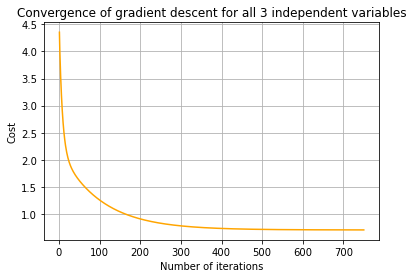

In [9]:
plt.plot(range(1, iterations + 1), cost_history, color = 'orange')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Convergence of gradient descent for all 3 independent variables")

The Y value was calculated using the final values of theta and the following experiemental values of (X1, X2, X3): (1, 1, 1), (2, 0, 4), and (3, 2, 1). To do this a dot product with the theta matrix was used. To do this each of the X value matrices was expanded to have a 1 in the X0 position.

In [11]:
print('Using the following values of theta: ', theta)
XValueTest = np.matrix('1 1 1 1; 1 2 0 4; 1 3 2 1')
print('Testing with the following values of X', XValueTest)
PredictedYValues = XValueTest.dot(theta)
print('Predicted PredictedYValues)

[ 5.28709962 -2.02368     0.58130939 -0.27334098]
[[1 1 1 1]
 [1 2 0 4]
 [1 3 2 1]]
[[3.57138803 0.14637569 0.10533742]]
